FLOW:
1.   GENERATE STORY FROM LLMS (FINETUNED)
2.   GENERATE KEY SCENE
3. GET KEYWORDS FOR EACH SCENE
4. GENERATE IMAGES



1 generate story


In [ ]:
!pip install transformers

In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.1 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer
import torch
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b")
pipe = pipeline('text-generation', model='mosaicml/mpt-7b-storywriter', tokenizer=tokenizer, device='cuda:0')




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/457k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.36G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
!pip install ctransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.4 MB/s eta 0:00:00


In [ ]:
from ctransformers import AutoModelForCausalLM

# Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
llm = AutoModelForCausalLM.from_pretrained("TheBloke/Llama-2-7b-Chat-GGUF", model_type="llama", gpu_layers=50)

print(llm("The story is about a "))


SyntaxError: unterminated string literal (detected at line 6) (<ipython-input-8-a0d0b4e2cf8d>, line 6)

In [ ]:
import torch

from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "GOAT-AI/GOAT-70B-Storytelling"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16
)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
# with torch.autocast('cuda', dtype=torch.bfloat16):
#     print(
#         pipe('Here is a recipe for vegan banana bread:\n',
#             max_new_tokens=100,
#             do_sample=True,
#             use_cache=True))

In [ ]:
# original_text="""I have lived so long in the shadow of this dream that I may never see the bright sunlight of reality. I may look up some morning and find that I am six feet under, and that Gatsby, who gave me the dream and everything else, will have vanished behind me.

# And so it was. I had hardly crossed the threshold of the old world when my eye caught the headlines of a newspaper, and I knew at once that my dream was over. I knew that Gatsby was dead.

# And I knew that day that I didn't love her.

# That night I took the last train for West Egg, and when I reached home I went directly to my attic and brought down all Gatsby's letters.

# I have sorted them by date and placed them in the order in which they were written. They are very few in number.

# They are dated between April of nineteen eighteen and January of nineteen nineteen, and the last one I have here is the one that told me he was dead.

# There is something in that last letter that frightens me. It is the sense of a finality, of a completeness. I never heard of him after that, and I was glad.

# But a few months ago I read somewhere that he had been seen in New York. He had become a great man.

# And I knew that he had not changed at all."""


In [ ]:
original_text1="""Once upon a time, in the heart of a lush forest, lived a curious little squirrel named Sammy. Sammy had soft, brown fur and a bushy tail that he proudly wagged as he explored the world around him. One sunny day, while scampering through the trees, he stumbled upon a cozy burrow belonging to a friendly family of rabbits. The rabbits welcomed him with open paws, and soon Sammy became their adventurous companion.

Together, they embarked on exciting journeys through the forest, hopping over fallen logs and chasing butterflies. One day, they encountered a wise old owl perched atop a gnarled oak tree. The owl shared tales of ancient wisdom and taught them the importance of friendship and kindness.

From that day on, Sammy and his rabbit friends lived harmoniously in the forest, spreading joy wherever they went. And as the sun set behind the trees, they nestled close together, grateful for the magic of their woodland home."""

generate key sentences


In [ ]:
!pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 26.7 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21691 sha256=df56fbdf9f7849b50165e77a1c6fad564133b1f20e328ae498bfa87b9c78eee8
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=8a0008a6193ef14bcae08458e715b636a480cfdc6ad2a0ebc39957de6e6d331d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# from sumy.parsers.plaintext import PlaintextParser
# from sumy.nlp.tokenizers import Tokenizer
# from sumy.summarizers.lex_rank import LexRankSummarizer
# my_parser = PlaintextParser.from_string(original_text,Tokenizer('english'))


In [ ]:
#for text 1
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
my_parser = PlaintextParser.from_string(original_text1,Tokenizer('english'))


In [ ]:
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=6)

# Printing the summary
for sentence in lexrank_summary:
  print(sentence)

Once upon a time, in the heart of a lush forest, lived a curious little squirrel named Sammy.
Sammy had soft, brown fur and a bushy tail that he proudly wagged as he explored the world around him.
One sunny day, while scampering through the trees, he stumbled upon a cozy burrow belonging to a friendly family of rabbits.
The rabbits welcomed him with open paws, and soon Sammy became their adventurous companion.
Together, they embarked on exciting journeys through the forest, hopping over fallen logs and chasing butterflies.
The owl shared tales of ancient wisdom and taught them the importance of friendship and kindness.


In [ ]:
lexrank_summary

(<Sentence: Once upon a time, in the heart of a lush forest, lived a curious little squirrel named Sammy.>,
 <Sentence: Sammy had soft, brown fur and a bushy tail that he proudly wagged as he explored the world around him.>,
 <Sentence: One sunny day, while scampering through the trees, he stumbled upon a cozy burrow belonging to a friendly family of rabbits.>,
 <Sentence: The rabbits welcomed him with open paws, and soon Sammy became their adventurous companion.>,
 <Sentence: Together, they embarked on exciting journeys through the forest, hopping over fallen logs and chasing butterflies.>,
 <Sentence: The owl shared tales of ancient wisdom and taught them the importance of friendship and kindness.>)

In [ ]:
my_list = list(lexrank_summary)

# Now my_list contains the elements of the tuple as a list
print(my_list)

[<Sentence: Once upon a time, in the heart of a lush forest, lived a curious little squirrel named Sammy.>, <Sentence: Sammy had soft, brown fur and a bushy tail that he proudly wagged as he explored the world around him.>, <Sentence: One sunny day, while scampering through the trees, he stumbled upon a cozy burrow belonging to a friendly family of rabbits.>, <Sentence: The rabbits welcomed him with open paws, and soon Sammy became their adventurous companion.>, <Sentence: Together, they embarked on exciting journeys through the forest, hopping over fallen logs and chasing butterflies.>, <Sentence: The owl shared tales of ancient wisdom and taught them the importance of friendship and kindness.>]


In [ ]:
new_list =[
    " Once upon a time, in the heart of a lush forest, lived a curious little squirrel named Sammy",
    " Sammy had soft, brown fur and a bushy tail that he proudly wagged as he explored the world around him.",
    " One sunny day, while scampering through the trees, he stumbled upon a cozy burrow belonging to a friendly family of rabbits.",
    " The rabbits welcomed him with open paws, and soon Sammy became their adventurous companion.",
    " Together, they embarked on exciting journeys through the forest, hopping over fallen logs and chasing butterflies.",
    " The owl shared tales of ancient wisdom and taught them the importance of friendship and kindness."
]

generate keywords from sentences


In [ ]:
key_scenes = [
    " Princess Rosalind, dressed in vibrant blue silk, stumbles upon a shimmering portal hidden within the castle library. Curiosity ignites in her eyes.",
    "Rosalind bravely steps through the portal, disappearing into a swirling vortex of light and color. The scene shifts to a fantastical landscape with floating islands and waterfalls.",
    "In this strange world, Rosalind meets a creature with shimmering wings and iridescent scales, looking lost and injured. Compassion fills Rosalind's heart.",
    "Working together, Rosalind and the creature solve a riddle or puzzle guarded by magical symbols, unlocking a hidden secret about the creature's origins.",
    "With the mystery solved, Rosalind finds a way to activate the portal again, guiding the creature back to its home amidst a breathtaking farewell scene.",
    "Back in her castle, Rosalind feels forever changed by her adventure. She incorporates elements of the fantastical world into her life, inspiring others with tales of courage and kindness.",
]

In [ ]:
key_scenes

[' Princess Rosalind, dressed in vibrant blue silk, stumbles upon a shimmering portal hidden within the castle library. Curiosity ignites in her eyes.',
 'Rosalind bravely steps through the portal, disappearing into a swirling vortex of light and color. The scene shifts to a fantastical landscape with floating islands and waterfalls.',
 "In this strange world, Rosalind meets a creature with shimmering wings and iridescent scales, looking lost and injured. Compassion fills Rosalind's heart.",
 "Working together, Rosalind and the creature solve a riddle or puzzle guarded by magical symbols, unlocking a hidden secret about the creature's origins.",
 'With the mystery solved, Rosalind finds a way to activate the portal again, guiding the creature back to its home amidst a breathtaking farewell scene.',
 'Back in her castle, Rosalind feels forever changed by her adventure. She incorporates elements of the fantastical world into her life, inspiring others with tales of courage and kindness.'

In [ ]:
!pip install rake_nltk

for rosalind

In [ ]:
# from rake_nltk import Rake

# # Define your key scenes as strings
# key_scenes = [
#     " Princess Rosalind, dressed in vibrant blue silk, stumbles upon a shimmering portal hidden within the castle library. Curiosity ignites in her eyes.",
#     "Rosalind bravely steps through the portal, disappearing into a swirling vortex of light and color. The scene shifts to a fantastical landscape with floating islands and waterfalls.",
#     "In this strange world, Rosalind meets a creature with shimmering wings and iridescent scales, looking lost and injured. Compassion fills Rosalind's heart.",
#     "Working together, Rosalind and the creature solve a riddle or puzzle guarded by magical symbols, unlocking a hidden secret about the creature's origins.",
#     "With the mystery solved, Rosalind finds a way to activate the portal again, guiding the creature back to its home amidst a breathtaking farewell scene.",
#     "Back in her castle, Rosalind feels forever changed by her adventure. She incorporates elements of the fantastical world into her life, inspiring others with tales of courage and kindness.",
# ]

# # Function for keyword extraction using RAKE
# def extract_keywords(text):
#     r = Rake()
#     r.extract_keywords_from_text(text)
#     return r.get_ranked_phrases()

# # Function to simplify scene description based on keywords
# def simplify_scene(keywords):
#     simplified_text = ""
#     for phrase in keywords:
#         simplified_text += phrase[0] + " "  # Add only the first keyword for each phrase
#     return simplified_text.strip()

# # Iterate through each scene and process
# for scene in key_scenes:
#     keywords = extract_keywords(scene)
#     simplified_prompt = simplify_scene(keywords)
#     print(f"Scene: {scene}")
#     print(f"Keywords: {keywords}")
#     # print(f"Simplified Prompt: {simplified_prompt}")
#     print("-" * 20)  # Separator for each scen

In [ ]:
from rake_nltk import Rake


# Function for keyword extraction using RAKE
def extract_keywords(text):
    r = Rake()
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()

# Function to simplify scene description based on keywords
def simplify_scene(keywords):
    simplified_text = ""
    for phrase in keywords:
        simplified_text += phrase[0] + " "  # Add only the first keyword for each phrase
    return simplified_text.strip()

# Iterate through each scene and process
for scene in new_list:
    keywords = extract_keywords(scene)
    simplified_prompt = simplify_scene(keywords)
    print(f"Scene: {scene}")
    print(f"Keywords: {keywords}")
    # print(f"Simplified Prompt: {simplified_prompt}")
    print("-" * 20)  # Separator for each scen

Scene:  Once upon a time, in the heart of a lush forest, lived a curious little squirrel named Sammy
Keywords: ['curious little squirrel named sammy', 'lush forest', 'upon', 'time', 'lived', 'heart']
--------------------
Scene:  Sammy had soft, brown fur and a bushy tail that he proudly wagged as he explored the world around him.
Keywords: ['world around', 'proudly wagged', 'bushy tail', 'brown fur', 'soft', 'sammy', 'explored']
--------------------
Scene:  One sunny day, while scampering through the trees, he stumbled upon a cozy burrow belonging to a friendly family of rabbits.
Keywords: ['one sunny day', 'cozy burrow belonging', 'stumbled upon', 'friendly family', 'trees', 'scampering', 'rabbits']
--------------------
Scene:  The rabbits welcomed him with open paws, and soon Sammy became their adventurous companion.
Keywords: ['soon sammy became', 'rabbits welcomed', 'open paws', 'adventurous companion']
--------------------
Scene:  Together, they embarked on exciting journeys throu

In [ ]:
vector illustration, breathtaking wedding shot of a couple, garden, flowers, greenery, sunny day

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 2.3 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

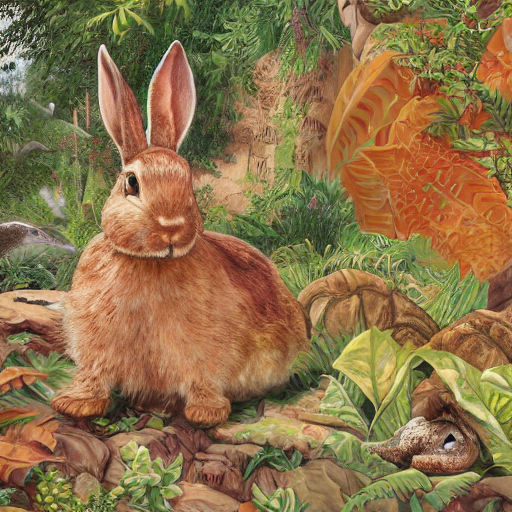

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image1 = pipeline("rabbit and a turtle in a jungle, cartoon ,anatomically correct,warm color palette, muted colors, detailed, 8k", guidance_scale=3.5, generator=generator).images[0]



image1

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")


In [ ]:
from diffusers import AutoPipelineForText2Image
import torch
import os
torch.cuda.empty_cache()
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = '1024'

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "shepard boy, sheep grazing nearby, rolling hills in the background, traditional setting, detailed, 8k resolution."

image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

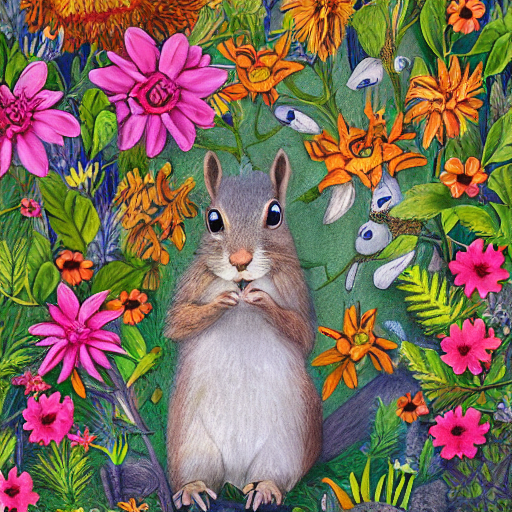

In [ ]:
image2 = pipeline("'curious little squirrel named sammy', 'lush forest', 'vector illustration, breathtaking , garden, flowers, greenery, sunny day'", guidance_scale=3.5, generator=generator).images[0]



image2

  0%|          | 0/50 [00:00<?, ?it/s]

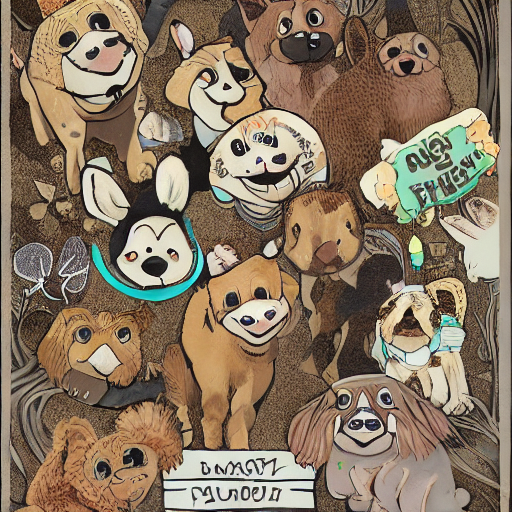

In [ ]:
# Scene:  Sammy had soft, brown fur and a bushy tail that he proudly wagged as he explored the world around him.
# Keywords: ['world around', 'proudly wagged', 'bushy tail', 'brown fur', 'soft', 'sammy', 'explored']


image2 = pipeline(""car'sammy', 'proudly wagged', 'bushy tail', 'brown fur', 'soft', 'sammy', 'explored', breathtaking '", guidance_scale=3.5, generator=generator).images[0]



image2